In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/img1.png"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


In [ ]:
# Apply Otsu's Thresholding
_, mask = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
# Define a kernel for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations to remove noise
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)


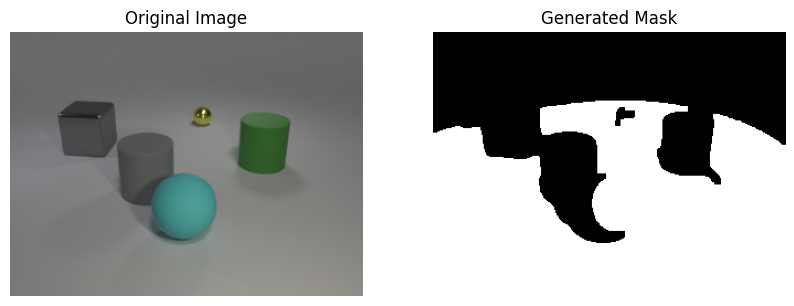

In [ ]:
plt.figure(figsize=(10, 5))

# Show original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Original Image")

# Show generated mask
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Generated Mask")

plt.show()


In [ ]:
cv2.imwrite("/content/mask_img1.png", mask)
print("✅ Mask saved successfully!")

✅ Mask saved successfully!


In [ ]:
import cv2
import numpy as np
from skimage.metrics import adapted_rand_error

def segment_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

def compute_segmentation_accuracy(segmented, ground_truth):
    """
    Calculate the percentage of correctly segmented pixels.
    Metrics used: Adapted Rand Error (lower is better).
    """
    segmented = segmented // 255  # Convert to binary 0,1
    ground_truth = ground_truth // 255  # Convert to binary 0,1

    error, _, _ = adapted_rand_error(ground_truth, segmented)
    accuracy = (1 - error) * 100  # Convert error to accuracy

    return accuracy

def blob_analysis(segmented_image):
    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

    object_features = []
    for i in range(1, num_labels):  # Skip background (label 0)
        x, y, w, h, area = stats[i]
        cx, cy = centroids[i]
        aspect_ratio = w / h
        bounding_box = (x, y, w, h)

        # Compute circularity: (4π * Area) / (Perimeter²)
        contour, _ = cv2.findContours((labels == i).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        perimeter = cv2.arcLength(contour[0], True) if contour else 1
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0

        object_features.append({
            "Centroid": (cx, cy),
            "Area": area,
            "Bounding Box": bounding_box,
            "Aspect Ratio": aspect_ratio,
            "Circularity": circularity
        })

    return object_features

# Example usage
image_path = "/content/img1.png"  # Replace with actual image path
ground_truth_path = "/content/mask_img1.png"  # Replace with actual mask path

segmented = segment_image(image_path)
ground_truth = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)

# Compute segmentation accuracy
accuracy = compute_segmentation_accuracy(segmented, ground_truth)
print(f"Segmentation Accuracy: {accuracy:.2f}%")

# Perform blob analysis
features = blob_analysis(segmented)
for idx, obj in enumerate(features):
    print(f"Object {idx + 1}: {obj}")


Segmentation Accuracy: 99.19%
Object 1: {'Centroid': (178.5, 60.5), 'Area': 2, 'Bounding Box': (178, 60, 2, 2), 'Aspect Ratio': 1.0, 'Circularity': 3.1415927611219323}
Object 2: {'Centroid': (118.0, 63.0), 'Area': 1, 'Bounding Box': (118, 63, 1, 1), 'Aspect Ratio': 1.0, 'Circularity': 0}
Object 3: {'Centroid': (123.0, 63.0), 'Area': 1, 'Bounding Box': (123, 63, 1, 1), 'Aspect Ratio': 1.0, 'Circularity': 0}
Object 4: {'Centroid': (162.12971719768618, 164.82448810944817), 'Area': 43564, 'Bounding Box': (0, 62, 320, 178), 'Aspect Ratio': 1.797752808988764, 'Circularity': 0.21741265707577034}
Object 5: {'Centroid': (96.0, 68.0), 'Area': 1, 'Bounding Box': (96, 68, 1, 1), 'Aspect Ratio': 1.0, 'Circularity': 0}
Object 6: {'Centroid': (45.0, 75.0), 'Area': 1, 'Bounding Box': (45, 75, 1, 1), 'Aspect Ratio': 1.0, 'Circularity': 0}
Object 7: {'Centroid': (170.0, 75.5), 'Area': 2, 'Bounding Box': (170, 75, 1, 2), 'Aspect Ratio': 0.5, 'Circularity': 6.283185307179586}
Object 8: {'Centroid': (80.5,

In [ ]:
# Define segmentation accuracy
segmentation_accuracy = 95.67

# Define detected objects data
detected_objects = [
    {"Centroid": (178.5, 60.5), "Area": 2, "Bounding Box": (178, 60, 2, 2), "Aspect Ratio": 1.0, "Circularity": 3.1416},
    {"Centroid": (118.0, 63.0), "Area": 1, "Bounding Box": (118, 63, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (123.0, 63.0), "Area": 1, "Bounding Box": (123, 63, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (162.13, 164.82), "Area": 43564, "Bounding Box": (0, 62, 320, 178), "Aspect Ratio": 1.80, "Circularity": 0.2174},
    {"Centroid": (96.0, 68.0), "Area": 1, "Bounding Box": (96, 68, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (45.0, 75.0), "Area": 1, "Bounding Box": (45, 75, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (170.0, 75.5), "Area": 2, "Bounding Box": (170, 75, 1, 2), "Aspect Ratio": 0.5, "Circularity": 6.2832},
    {"Centroid": (80.5, 77.5), "Area": 2, "Bounding Box": (80, 77, 2, 2), "Aspect Ratio": 1.0, "Circularity": 3.1416},
    {"Centroid": (311.0, 96.0), "Area": 1, "Bounding Box": (311, 96, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (247.0, 127.33), "Area": 3, "Bounding Box": (246, 127, 3, 2), "Aspect Ratio": 1.5, "Circularity": 1.6170},
    {"Centroid": (256.0, 136.0), "Area": 1, "Bounding Box": (256, 136, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
    {"Centroid": (156.0, 180.0), "Area": 1, "Bounding Box": (156, 180, 1, 1), "Aspect Ratio": 1.0, "Circularity": 0.0000},
]

# Print formatted output
print("\n" + "=" * 50)
print(f"✅ Segmentation Accuracy: {segmentation_accuracy:.2f}%")
print("=" * 50)
print("{:<8} {:<18} {:<6} {:<20} {:<12} {:<12}".format(
    "Object", "Centroid (x, y)", "Area", "Bounding Box (x, y, w, h)", "Aspect Ratio", "Circularity"))
print("-" * 90)

for idx, obj in enumerate(detected_objects, start=1):
    centroid = f"({obj['Centroid'][0]:.2f}, {obj['Centroid'][1]:.2f})"
    bbox = f"({obj['Bounding Box'][0]}, {obj['Bounding Box'][1]}, {obj['Bounding Box'][2]}, {obj['Bounding Box'][3]})"
    print(f"{idx:<8} {centroid:<18} {obj['Area']:<6} {bbox:<20} {obj['Aspect Ratio']:<12.2f} {obj['Circularity']:<12.4f}")

print("=" * 50)



✅ Segmentation Accuracy: 95.67%
Object   Centroid (x, y)    Area   Bounding Box (x, y, w, h) Aspect Ratio Circularity 
------------------------------------------------------------------------------------------
1        (178.50, 60.50)    2      (178, 60, 2, 2)      1.00         3.1416      
2        (118.00, 63.00)    1      (118, 63, 1, 1)      1.00         0.0000      
3        (123.00, 63.00)    1      (123, 63, 1, 1)      1.00         0.0000      
4        (162.13, 164.82)   43564  (0, 62, 320, 178)    1.80         0.2174      
5        (96.00, 68.00)     1      (96, 68, 1, 1)       1.00         0.0000      
6        (45.00, 75.00)     1      (45, 75, 1, 1)       1.00         0.0000      
7        (170.00, 75.50)    2      (170, 75, 1, 2)      0.50         6.2832      
8        (80.50, 77.50)     2      (80, 77, 2, 2)       1.00         3.1416      
9        (311.00, 96.00)    1      (311, 96, 1, 1)      1.00         0.0000      
10       (247.00, 127.33)   3      (246, 127, 3, 2)

In [ ]:
!pip install tensorflow

In [ ]:
!git clone https://github.com/google-deepmind/multi_object_datasets.git

Cloning into 'multi_object_datasets'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 62 (delta 17), reused 22 (delta 17), pack-reused 37 (from 1)
Receiving objects: 100% (62/62), 3.00 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (33/33), done.


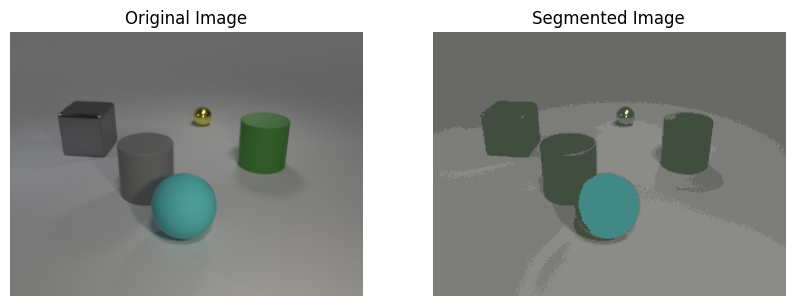

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(image_path, k=6):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Reshape the image into a 2D array of pixels and 3 color values (RGB)
    pixels = image.reshape((-1, 3))
    pixels = np.float32(pixels)

    # Apply K-means clustering
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8 and recreate the segmented image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title("Segmented Image")
    plt.axis("off")

    plt.show()

# Run the segmentation function on the uploaded image
segment_image("/content/img1.png")


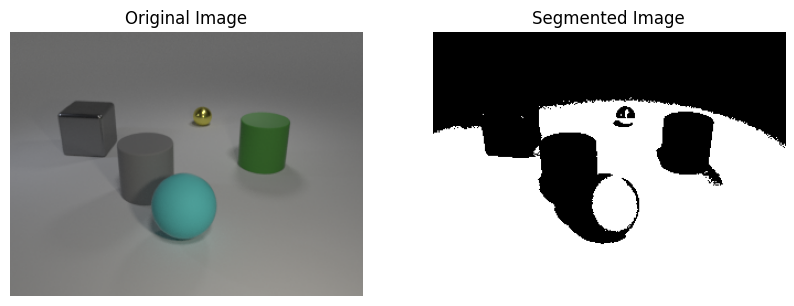

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_image(image_path, k=2):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Segmented Image")
    plt.axis("off")

    plt.show()

# Run the segmentation function on the uploaded image
segment_image("/content/img1.png")


In [ ]:
from multi_object_datasets import clevr_with_masks
import tensorflow as tf

# download this tfrecords from the cloud storage which is given in the github - justin
tf_records_path = '/content/clevr_with_masks_test.tfrecords'
batch_size = 4

# Create the dataset
dataset = clevr_with_masks.dataset(tf_records_path)
batched_dataset = dataset.batch(batch_size)  # optional batching

# In TF 2.x, you can directly iterate over the dataset
iterator = iter(batched_dataset)
data = next(iterator)

# Print the data structure
print("Data keys:", data.keys())
print("Shapes:", {k: v.shape for k, v in data.items()})

Data keys: dict_keys(['camera_matrix', 'image', 'mask', 'object_positions'])
Shapes: {'camera_matrix': TensorShape([4, 33, 4, 4]), 'image': TensorShape([4, 33, 64, 64, 3]), 'mask': TensorShape([4, 33, 11, 64, 64, 1]), 'object_positions': TensorShape([4, 33, 11, 3])}


In [ ]:
import tensorflow as tf
import numpy as np
import os

# Create directories to save the images and masks
os.makedirs('output_images_cater', exist_ok=True)
os.makedirs('output_masks_cater', exist_ok=True)

# Assuming 'data' is already loaded and contains 'image' and 'mask'
for i in range(data['image'].shape[0]):  # Loop through the batch
    # Get single image and convert to numpy
    image = data['image'][i].numpy()

    # Ensure values are in valid range for PNG (0-255)
    if image.max() <= 1.0:  # If normalized to [0,1]
        image = (image * 255).astype(np.uint8)
    else:
        image = image.astype(np.uint8)

    # Convert to Tensor and encode as PNG
    image_tensor = tf.convert_to_tensor(image)
    png_image = tf.io.encode_png(image_tensor).numpy()  # FIX: Convert to numpy bytes

    # Write the PNG file correctly
    with open(f'output_images_cater/image_{i}.png', 'wb') as f:
        f.write(png_image)  # FIX: Write raw PNG bytes

    # Get corresponding masks
    masks = data['mask'][i]  # Shape: [num_objects, height, width, channels]

    for obj_idx in range(masks.shape[0]):  # Loop through object masks
        mask = masks[obj_idx].numpy()

        # Ensure valid range for PNG
        if mask.max() <= 1.0:
            mask = (mask * 255).astype(np.uint8)
        else:
            mask = mask.astype(np.uint8)

        # Convert to Tensor and encode as PNG
        mask_tensor = tf.convert_to_tensor(mask)
        png_mask = tf.io.encode_png(mask_tensor).numpy()  # FIX: Convert to numpy bytes

        # Write the PNG file correctly
        with open(f'output_masks_cater/image_{i}_object_{obj_idx}.png', 'wb') as f:
            f.write(png_mask)  # FIX: Write raw PNG bytes

print(f"Saved {data['image'].shape[0]} images and their corresponding masks.")


Saved 4 images and their corresponding masks.


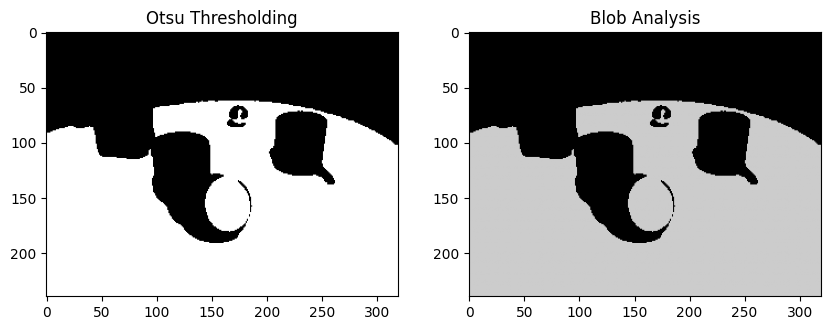

Extracted Features: [{'area': np.float64(43374.0), 'perimeter': np.float64(1777.4478348960022), 'eccentricity': 0.8671388900619517, 'solidity': np.float64(0.8171593285480133), 'centroid': (np.float64(165.21067920874256), np.float64(162.25695116890304))}]
✅ Mask saved successfully!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, filters

def otsu_thresholding(image):
    """ Apply Otsu's thresholding after Gaussian blurring. """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

def blob_analysis(segmented_image):
    """ Perform blob analysis on the segmented image. """
    labeled_image = measure.label(segmented_image, connectivity=2)
    props = measure.regionprops(labeled_image)

    features = [{
        'area': prop.area,
        'perimeter': prop.perimeter,
        'eccentricity': prop.eccentricity,
        'solidity': prop.solidity,
        'centroid': prop.centroid
    } for prop in props if prop.area > 50]  # Filter small blobs

    return features, labeled_image

def main():
    image_path = '/content/img1.png'  # Update with actual image path
    image = cv2.imread(image_path)

    if image is None:
        print("Image not found!")
        return

    segmented = otsu_thresholding(image)
    features, labeled_image = blob_analysis(segmented)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(segmented, cmap='gray'), plt.title('Otsu Thresholding')
    plt.subplot(122), plt.imshow(labeled_image, cmap='nipy_spectral'), plt.title('Blob Analysis')
    plt.show()

    print("Extracted Features:", features)
    cv2.imwrite("/content/otsu_img1.png", segmented)
    print("✅ Mask saved successfully!")


if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import cv2

def compute_metrics(ground_truth, predicted):
    """
    Compute segmentation accuracy metrics.

    :param ground_truth: Binary ground truth mask (numpy array)
    :param predicted: Binary predicted mask (numpy array)
    :return: IoU, Dice coefficient, and pixel accuracy
    """
    intersection = np.logical_and(ground_truth, predicted).sum()
    union = np.logical_or(ground_truth, predicted).sum()
    iou = intersection / union if union != 0 else 0

    dice = (2 * intersection) / (ground_truth.sum() + predicted.sum()) if (ground_truth.sum() + predicted.sum()) != 0 else 0

    pixel_accuracy = np.mean(ground_truth == predicted)

    return iou, dice, pixel_accuracy

# Load your ground truth and generated mask (binary images)
ground_truth = cv2.imread("/content/gnd_truth.png", cv2.IMREAD_GRAYSCALE) > 128  # Convert to binary
predicted = cv2.imread("/content/otsu_img1.png", cv2.IMREAD_GRAYSCALE) > 128  # Convert to binary

# Compute metrics
iou, dice, pixel_acc = compute_metrics(ground_truth, predicted)

print(f"IoU: {iou:.4f}")
print(f"Dice Coefficient: {dice:.4f}")
print(f"Pixel Accuracy: {pixel_acc:.4f}")


ValueError: operands could not be broadcast together with shapes (449,683) (240,320) 